## Overlapping Nightly Jobs

Every night between 7 PM and midnight, two computing jobs from two different sources are randomly started, with each one lasting one hour. Unfortunately, when the jobs are running simultaneously they cause a failure in some of the company's other nightly jobs. This failure results in downtime for the company that costs $1,000.

The CEO needs you to tell her the annual cost of this issue. Use Python to simulate this situation and estimate the annual cost.

In [1]:
import numpy as np

In [2]:
job1 = np.random.uniform(7,12,size=10**8)
job2 = np.random.uniform(7,12,size=10**8)
p = np.mean(np.abs(job1-job2) <=1)

In [3]:
p*365*1000

131374.80405

## Finding confidence intervals

Using pure simulation

In [4]:
import matplotlib.pyplot as plt

In [21]:
num_sims=10**5
cost = np.zeros(num_sims)

for i in range(num_sims):
    job1 = np.random.uniform(7,12,size=365)
    job2 = np.random.uniform(7,12,size=365)
    cost[i] = np.sum(np.abs(job1-job2) <=1)*1000

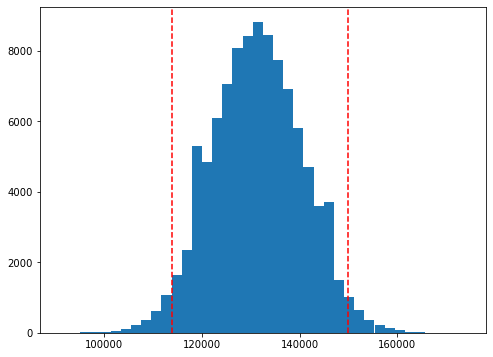

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(cost, bins=40)
ax.axvline(np.percentile(cost, 2.5), color='r', linestyle='--')
ax.axvline(np.percentile(cost, 97.5), color='r', linestyle='--');

In [23]:
print("Expected cost: ", np.mean(cost))
print("95% Confidence Interval: ", np.percentile(cost, 2.5), np.percentile(cost, 97.5))

Expected cost:  131382.81
95% Confidence Interval:  114000.0 150000.0


### Using Binomial Distribution with approximated p

First simulate to find an approximate p, then construct a binomial distribution

In [8]:
from scipy.stats import binom

In [9]:
job1 = np.random.uniform(7,12,size=10**8)
job2 = np.random.uniform(7,12,size=10**8)
p = np.mean(np.abs(job1-job2) <=1)

In [10]:
dist = binom(n=365, p=p)

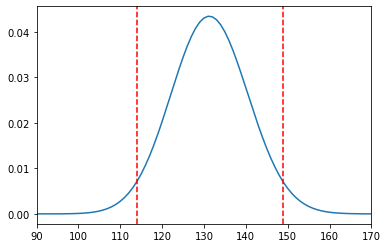

In [11]:
x = np.arange(0,365)

fig, ax = plt.subplots()
ax.plot(x, dist.pmf(x))
ax.set_xlim(90,170)
ax.axvline(dist.ppf(.025), color='r', linestyle='--')
ax.axvline(dist.ppf(.975), color='r', linestyle='--');

In [12]:
print('Expected cost: ', p * 365 * 1000)
print('95% Confidence Interval: ', dist.ppf(.025)*1000, dist.ppf(.975)*1000)

Expected cost:  131390.30925
95% Confidence Interval:  114000.0 149000.0


### Using Normal Distribution to approximate Binomial Distribution with approximated p

In [13]:
from scipy.stats import norm

In [14]:
job1 = np.random.uniform(7,12,size=10**8)
job2 = np.random.uniform(7,12,size=10**8)

p = np.mean(np.abs(job1-job2) <=1)
n=365

mu=n*p
sigma=np.sqrt(n*p*(1-p))

In [15]:
dist = norm(loc=mu, scale=sigma)

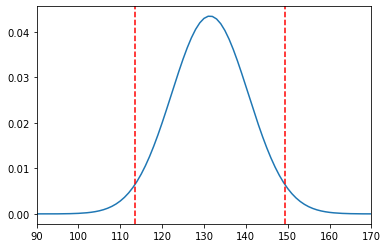

In [16]:
x = np.arange(0,365)

fig, ax = plt.subplots()
ax.plot(x, dist.pdf(x))
ax.set_xlim(90,170)
ax.axvline(dist.ppf(.025), color='r', linestyle='--')
ax.axvline(dist.ppf(.975), color='r', linestyle='--');

In [17]:
print('Expected cost: ', p * 365 * 1000)
print('95% Confidence Interval: ', dist.ppf(.025)*1000, dist.ppf(.975)*1000)

Expected cost:  131424.72144999998
95% Confidence Interval:  113450.35344569947 149399.0894543005
